In [1]:
# cnn_basic
# conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


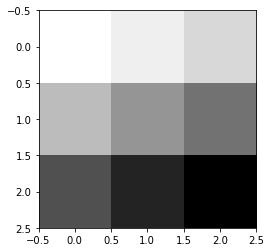

In [2]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)

print(image)
print(image.shape)  # (1, 3, 3, 1), Rank = 4, 4차원
plt.imshow(image.reshape(3,3), cmap='Greys')

## CNN(Convolutional Neural Network)

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


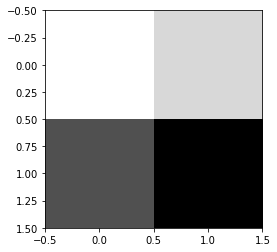

In [3]:
# conv2d layer, filter : (2,2,1,1), strides : 1

# 입력 이미지 : (1,3,3,1)
# 1 : 이미지의 갯수
# 3 : 가로 크기
# 3 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3

# filter : (2,2,1,1)
# 2 : 가로 크기
# 2 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3
# 1 : filter 의 갯수

# (N - F)/strides + 1
# 출력 이미지 : (3 - 2)/1 + 1 = 2, zero padding을 안했을 때 (padding='VALID')
# (1,3,3,1) ---> (1,2,2,1)

# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1],padding='VALID')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1, 2, 2, 1)

# 시각화
plt.imshow(conv2d_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


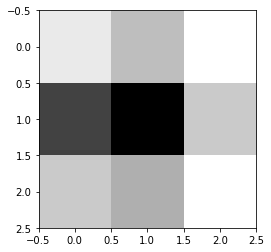

In [4]:
# 출력 이미지 : (3+1 - 2)/1 + 1 = 3, zero padding을 했을 때 (padding='SAME')
#  filter : (2,2,1,1), strides : 1
# (1,3,3,1) --> (1,3,3,1)

# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1, 3, 3, 1)

# 시각화
plt.imshow(conv2d_image.reshape(3,3),cmap='Greys')
plt.show()

[[[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]


 [[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]]
--------------------------------------------------
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]] (3, 3, 3, 1)


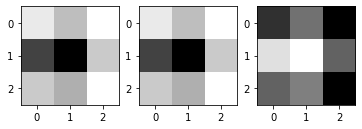

In [9]:
# conv2d layer, 3 filters, zero padding(padding='SAME')
# image : (1,3,3,1), filter : (2,2,1,3) , strides = (1,1,1,1)
# output : (1,3,3,3)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],     
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])

print(weight.numpy())
print('-'*50)

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1, 3, 3, 3)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3)  # 0번 축과 3번 축이 서로 맞바꾸어짐
print(conv2d_image, conv2d_image.shape )  # (3,3,3,1)

for i, one_image in enumerate(conv2d_image):
    # print(one_image)   # (3,3,1)
    plt.subplot(1,3, i + 1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')

## Pooling Layer

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


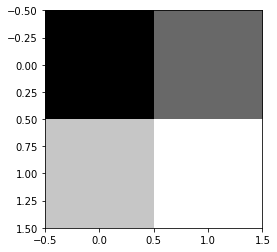

In [10]:
# max pooling
image  = np.array([[[[4.],[3.]],
                    [[2.],[1.]]]],dtype=np.float32)
print(image)
print(image.shape) # (1, 2, 2, 1)
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [12]:
# padding='VALID'  , zero padding을 하지 않음  , (1,2,2,1) --> (1,1,1,1)
# (N - F)/strides + 1 , F: kernel size(ksize)
# (2 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1],padding='VALID')
print(pool.numpy())
print(pool.shape)  # (1, 1, 1, 1)

[[[[4.]]]]
(1, 1, 1, 1)


In [13]:
# padding='SAME'  , zero padding을 했을 때  , (1,2,2,1) --> (1,2,2,1)
# (N - F)/strides + 1 , F: kernel size(ksize)
# (2+1 - 2)/1 + 1 = 2
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1],padding='SAME')
print(pool.numpy())
print(pool.shape)  # (1, 2, 2, 1)

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


(60000, 28, 28)
(28, 28)
2


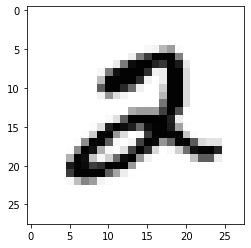

In [46]:
# MNIST image data
# MNIST(Modified National Institute of Standard Technology) Dataset
# label : 0 ~ 9 , 손글씨체 이미지  28*28(784 byte) , gray scale  , Train:60000개, Test:10000개

# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

image = x_train[5]
print(image.shape) # (28, 28)
print(y_train[5])  # 숫자 2

plt.imshow(image, cmap='Greys')
plt.show()

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


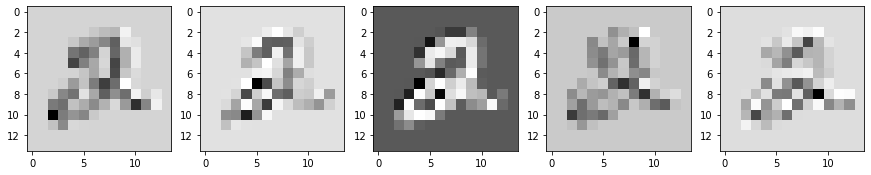

In [54]:
#### MNIST conv2d layer
# image : (1,28,28,1)
# filter : (3,3,1,5) , 필터 5개
# stride : (1,2,2,1) , padding = 'SAME'
# 출력 이미지 : (28+1 - 3)/1 + 1 = 14
# (1,28,28,1) --> (1,14,14,5)

img = image.reshape(-1,28,28,1)
print(img.shape)

# filter = weight 초기화
W = tf.Variable(tf.random.normal([3,3,1,5]), name='weight')
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image.shape)  # (1, 14, 14, 5)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3)  # 0번 축과 3번 축이 서로 맞바꾸어짐
print(conv2d_image.shape )      # (5, 14, 14, 1)

plt.figure(figsize=(15,15))
for i, one_image in enumerate(conv2d_image):
    # print(one_image)   # (14,14,1)
    plt.subplot(1,5, i + 1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')
plt.show()

(1, 7, 7, 5)
(5, 7, 7, 1)


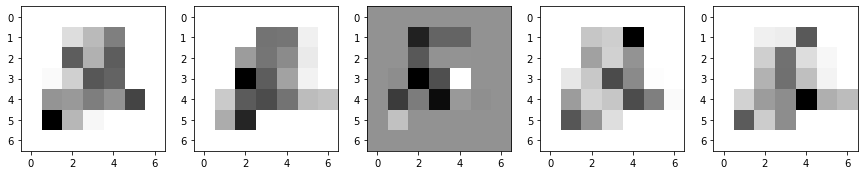

In [58]:
# MNIST max_pool layer
# conv2d image : (1, 14, 14, 5)
# ksize : (1,2,2,1), strides :(1,2,2,1), padding='SAME'
# 출력 이미지 : (14+1 - 2)/2 + 1 = 7
# (1, 14, 14, 5) --> (1, 7, 7, 5)

pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

pool_image = pool.numpy()
print(pool_image.shape)  # (1, 7, 7, 5)

# 시각화
pool_image = np.swapaxes(pool_image,0,3)  # 0번 축과 3번 축이 서로 맞바꾸어짐
print(pool_image.shape )      # (5, 7, 7, 1)

plt.figure(figsize=(15,15))
for i, one_image in enumerate(pool_image):
    # print(one_image)   # (7,7,1)
    plt.subplot(1,5, i + 1)
    plt.imshow(one_image.reshape(7,7),cmap='Greys')
plt.show()